In [140]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.16.1


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kelvin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [141]:
df = pd.read_json("E:/Sarcasm_Headlines_Dataset_v2.json", lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [142]:
del df['article_link']
df.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


In [143]:
lab_to_sarcasm = {0:"Not Sarcastic", 1:"Sarcastic"}
def label_decoder(label):
  return lab_to_sarcasm[label]
df.is_sarcastic = df.is_sarcastic.apply(lambda x: label_decoder(x))
df.head()

,is_sarcastic,headline
0,Sarcastic,thirtysomething scientists unveil doomsday clo...
1,Not Sarcastic,dem rep. totally nails why congress is falling...
2,Not Sarcastic,eat your veggies: 9 deliciously different recipes
3,Sarcastic,inclement weather prevents liar from getting t...
4,Sarcastic,mother comes pretty close to using word 'strea...


Text(0.5, 1.0, 'Sarcasm Data Distribution')

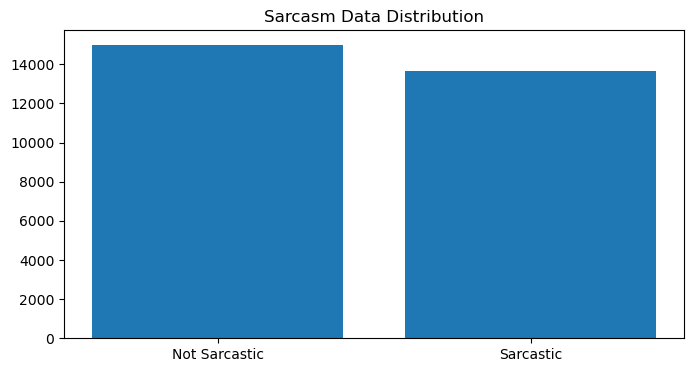

In [144]:
val_count = df.is_sarcastic.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sarcasm Data Distribution")

In [145]:
import random
random_idx_list = [random.randint(1,len(df.headline)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,is_sarcastic,headline
11422,Sarcastic,salad suppliers pledge to continue including j...
3636,Not Sarcastic,the winners and losers of the nba draft lottery
11680,Not Sarcastic,firefighters gaining ground against california...
18145,Sarcastic,study finds rising sea levels result of expans...
15407,Not Sarcastic,johnny galecki returns to 'roseanne' and reuni...
6405,Not Sarcastic,rachel maddow blasts benghazi committee as a '...
12557,Not Sarcastic,harvard's black students pen powerful response...
20113,Not Sarcastic,louis c.k. reveals he once ruined a job for ji...
19745,Not Sarcastic,st. louis cardinals fans have a seriously raci...
22517,Sarcastic,woman feels like she's finally ready to start ...


In [146]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Kelvin\AppData\Local\Temp\ipykernel_3216\3341848437.py:4: SyntaxWarning: invalid escape sequence '\S'
  text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"


In [147]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [148]:
df.headline = df.headline.apply(lambda x: preprocess(x))

# Split & Train

In [149]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [150]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 22895
Test Data size 5724


In [151]:
train_data.head(10)

,is_sarcastic,headline
433,Sarcastic,experts caution new car loses 90 value soon dr...
17842,Sarcastic,could harvey weinstein get away asks man curre...
25394,Not Sarcastic,twitterverse trolls marco rubio fool bible ver...
379,Not Sarcastic,russell simmons leads muslim rally new york
6495,Not Sarcastic,fall looks like sign us
16203,Not Sarcastic,gluten free mania following fad marketer dream...
22168,Sarcastic,follow instructions part plan hisses richard n...
22547,Not Sarcastic,gay couple opens building beautiful family
19872,Sarcastic,kathie lee gifford denies getting sincerity im...
7503,Not Sarcastic,erika christensen cole maness married


In [152]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.headline)

word_index = tokenizer.word_index
vocab_size = 300000
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 300000


In [153]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.headline),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.headline),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (22895, 30)
Testing X Shape: (5724, 30)


In [154]:
labels = train_data.is_sarcastic.unique().tolist()

In [155]:
encoder = LabelEncoder()
encoder.fit(train_data.is_sarcastic.to_list())

y_train = encoder.transform(train_data.is_sarcastic.to_list())
y_test = encoder.transform(test_data.is_sarcastic.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (22895, 1)
y_test shape: (5724, 1)


https://nlp.stanford.edu/data/glove.6B.zip

In [156]:
GLOVE_EMB = 'E:/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = 'E:/best_model.hdf5'

In [157]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [158]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [159]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

c:\Users\Kelvin\miniconda3\envs\ml\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [160]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [161]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [162]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [163]:
tf.config.list_physical_devices('GPU')

[]

In [164]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 229ms/step - accuracy: 0.5913 - loss: 0.6572 - val_accuracy: 0.7310 - val_loss: 0.5424 - learning_rate: 0.0010
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - accuracy: 0.7419 - loss: 0.5232 - val_accuracy: 0.7526 - val_loss: 0.5017 - learning_rate: 0.0010
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - accuracy: 0.7653 - loss: 0.4876 - val_accuracy: 0.7664 - val_loss: 0.4791 - learning_rate: 0.0010
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 215ms/step - accuracy: 0.7906 - loss: 0.4495 - val_accuracy: 0.7820 - val_loss: 0.4612 - learning_rate: 0.0010
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.8050 - loss: 0.4196 - val_accuracy: 0.7853 - val_loss: 0.4481 - learning_rate: 0.0010
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - accuracy: 0.8237 - loss: 0.3876 - val_accuracy: 0.7947 - val_loss: 0.4552 - learning_rate: 0.0010
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 220ms/step - accuracy: 0.8466 - loss: 0.3498 -

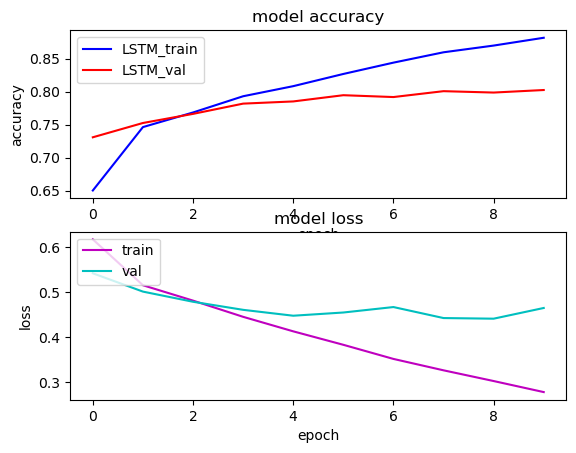

In [165]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [166]:
def decode_sarcasm(score):
    return "Sarcastic" if score>0.5 else "Not Sarcastic"

scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sarcasm(score) for score in scores]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [167]:
from sklearn.metrics import classification_report
print(classification_report(list(test_data.is_sarcastic), y_pred_1d))

               precision    recall  f1-score   support

Not Sarcastic       0.79      0.85      0.82      3025
    Sarcastic       0.81      0.75      0.78      2699

     accuracy                           0.80      5724
    macro avg       0.80      0.80      0.80      5724
 weighted avg       0.80      0.80      0.80      5724



In [168]:
import pickle
with open(r'E:/Research ML/LSTM_SarcasmDetection.pkl', 'wb') as file:  
    pickle.dump(model, file)